In [33]:
df=pd.DataFrame({'grade':['steep','steep','flat','steep'],
'bumpiness':['bumpy','smooth','bumpy','smooth'],
'speed_limit':['yes','yes','no','no'],
'speed':['slow','slow','fast','fast']})
df.head()

,bumpiness,grade,speed,speed_limit
0,bumpy,steep,slow,yes
1,smooth,steep,slow,yes
2,bumpy,flat,fast,no
3,smooth,steep,fast,no


$entropy = - \sum\limits_{i} {p_i\cdot \log_2(p_i)}$

In [34]:
def entropy(p):
    return -p*np.log2(p)
def entropy_list(s):
    s=pd.Series(s)
    n=s.shape[0]
    values=s.value_counts()/n
    total_entropy=values.apply(lambda r:entropy(r)).sum()
    return total_entropy

In [35]:
def entropy_bin(p):
    t = entropy(p)+entropy(1-p)
    return t

Plotting entropy for a two_class sample

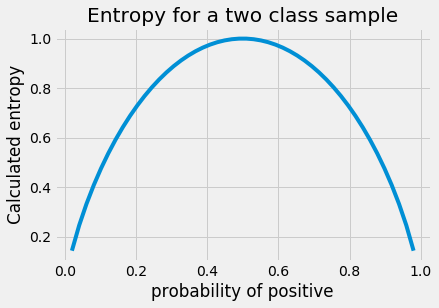

In [31]:
x=np.linspace(0,1)
ax=pd.Series(index=x,data=x).apply(lambda r:entropy_bin(r)).plot()
ax.set_xlabel('probability of positive')
ax.set_ylabel('Calculated entropy')
ax.set_title('Entropy for a two class sample');

In [36]:
entropy_list(df['speed'])

1.0

In [42]:
def calculate_information_gain(values,ix_split):
    """
    values (pd.Series): set of class values
    ix_split: index on which to perform the split
    """
    e_parent= entropy_list(values)
    
    v1=values.loc[ix_split]
    w1=v1.shape[0]/values.shape[0]
    e1=entropy_list(v1)
    
    v2=values.loc[~values.index.isin(ix_split)]
    w2=v2.shape[0]/values.shape[0]
    e2=entropy_list(v2)
    
    e_children=w1*e1+e2*w2
    return e_parent-e_children
calculate_information_gain(values=df['speed'],
                       ix_split=df[df['bumpiness']=='bumpy'].index)

0.0